# Part I - (PROSPER LOAN Dataset Exploration)
## by (ILERIOLA OLANREWAJU)

## Introduction
> This document explores a dataset that contains 113,937 loans with 81 variables on each loan. The variables are about the loan information and that of the borrower.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,10)


%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.describe

<bound method NDFrame.describe of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5       0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6       0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7       0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
10      0F123545674891886D9F106         587746  2012-05-10 07:04:01.5770000

In [6]:
df.drop_duplicates(subset=['ListingKey'], inplace=True)

In [7]:
df[df.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


> Some features do not have impact on the loan 

In [8]:
df.drop(['ListingKey','ListingNumber','GroupKey','LoanKey','LoanNumber','MemberKey','DateCreditPulled'],axis=1,inplace= True)
df.tail()

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,0.0699,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,0.0200,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,0.0850,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,0.09071,0.0299,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [9]:
#df.dropna(inplace=True)

In [10]:
df_exp = df[[ 'CreditGrade', 
               'Term', 
               'LoanStatus', 
               'BorrowerAPR', 
               'BorrowerRate',      
               'ProsperScore', 
               'ListingCategory (numeric)', 
               'BorrowerState', 
               'Occupation', 
               'EmploymentStatus', 
               'EmploymentStatusDuration', 
               'IsBorrowerHomeowner', 
               'IncomeRange',
               'ProsperRating (Alpha)',
              'StatedMonthlyIncome',
               'TotalProsperLoans',
               'MonthlyLoanPayment',
               'LoanOriginalAmount'
              ]]
df_exp.sample(10)

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,ProsperRating (Alpha),StatedMonthlyIncome,TotalProsperLoans,MonthlyLoanPayment,LoanOriginalAmount
60516,NaN,60,Current,0.15629,0.1334,8.0,18,IL,Sales - Commission,Self-employed,46.0,False,"$50,000-74,999",A,5000.000000,3.0,188.01,8200
72168,NaN,36,Completed,0.25781,0.2199,6.0,7,CA,Professional,Self-employed,87.0,False,"$1-24,999",D,1666.666667,NaN,572.78,15000
62616,NaN,60,Current,0.20040,0.1765,5.0,1,CA,Clerical,Employed,165.0,False,"$50,000-74,999",C,5000.000000,NaN,126.02,5000
82613,A,36,Chargedoff,0.13453,0.1275,NaN,0,FL,Construction,Full-time,86.0,False,"$25,000-49,999",NaN,3992.833333,NaN,465.00,13850
31843,NaN,36,Completed,0.27467,0.2399,4.0,1,NV,Pharmacist,Employed,68.0,True,"$100,000+",D,10416.666667,1.0,392.28,10000
61371,NaN,36,Current,0.31790,0.2786,5.0,1,IL,Sales - Commission,Employed,115.0,True,"$75,000-99,999",E,6500.000000,NaN,247.73,6000
85418,NaN,36,Completed,0.35643,0.3199,5.0,2,NC,Professional,Employed,1.0,True,"$75,000-99,999",E,7291.666667,1.0,261.29,6000
46646,NaN,36,Completed,0.37453,0.3500,10.0,1,MA,Professional,Full-time,139.0,False,"$50,000-74,999",E,5000.000000,1.0,0.00,2000
72483,NaN,36,Chargedoff,0.29510,0.2599,6.0,7,MD,Other,Not employed,21.0,False,Not employed,D,0.000000,NaN,201.43,5000
50766,E,36,Chargedoff,0.20976,0.1950,NaN,0,IL,Clerical,Full-time,21.0,False,"$25,000-49,999",NaN,3000.000000,NaN,81.20,2200


In [11]:
df_exp[df_exp.duplicated()]

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,ProsperRating (Alpha),StatedMonthlyIncome,TotalProsperLoans,MonthlyLoanPayment,LoanOriginalAmount
57991,NaN,60,Current,0.28129,0.2554,2.0,7,KS,Teacher,Employed,5.0,False,"$25,000-49,999",E,2955.250000,NaN,118.67,4000
92367,HR,36,Defaulted,0.29776,0.2900,NaN,0,GA,Other,Not available,NaN,False,Not displayed,NaN,2500.000000,NaN,125.76,3001
93345,HR,36,Chargedoff,0.30962,0.2900,NaN,0,NaN,Professional,Not available,NaN,False,Not displayed,NaN,2083.333333,NaN,41.91,1000
107579,NaN,60,Current,0.31375,0.2870,5.0,3,GA,Construction,Self-employed,74.0,True,"$75,000-99,999",D,6666.666667,NaN,473.39,15000
109289,HR,36,Defaulted,0.18824,0.1700,NaN,0,FL,Clerical,Not available,NaN,False,Not displayed,NaN,1250.000000,NaN,35.65,1000
113663,HR,36,Chargedoff,0.29525,0.2875,NaN,0,NaN,NaN,NaN,NaN,False,Not displayed,NaN,3500.000000,NaN,104.42,2500


In [12]:
df_exp = df_exp.drop_duplicates()

In [13]:
df_exp[df_exp.duplicated()]

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,ProsperRating (Alpha),StatedMonthlyIncome,TotalProsperLoans,MonthlyLoanPayment,LoanOriginalAmount


In [14]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113060 entries, 0 to 113936
Data columns (total 18 columns):
CreditGrade                  28949 non-null object
Term                         113060 non-null int64
LoanStatus                   113060 non-null object
BorrowerAPR                  113035 non-null float64
BorrowerRate                 113060 non-null float64
ProsperScore                 83980 non-null float64
ListingCategory (numeric)    113060 non-null int64
BorrowerState                107547 non-null object
Occupation                   109532 non-null object
EmploymentStatus             110806 non-null object
EmploymentStatusDuration     105439 non-null float64
IsBorrowerHomeowner          113060 non-null bool
IncomeRange                  113060 non-null object
ProsperRating (Alpha)        83980 non-null object
StatedMonthlyIncome          113060 non-null float64
TotalProsperLoans            21923 non-null float64
MonthlyLoanPayment           113060 non-null float64
LoanOr

In [15]:
df_exp = df_exp[df_exp['ProsperRating (Alpha)'].notnull()]
#df_exp['ProsperRating (Alpha)'].isnull()

In [16]:
#df_exp = df_exp[df_exp['CreditGrade'].notnull()]

In [17]:
#df_exp = df_exp[df_exp['BorrowerRate'].notnull()]

In [18]:
df_exp.Occupation = df_exp.Occupation.fillna('Unknown')

In [19]:
df_exp.tail()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,ProsperRating (Alpha),StatedMonthlyIncome,TotalProsperLoans,MonthlyLoanPayment,LoanOriginalAmount
113932,NaN,36,Current,0.22354,0.1864,5.0,1,IL,Food Service Management,Employed,246.0,True,"$50,000-74,999",C,4333.333333,NaN,364.74,10000
113933,NaN,36,FinalPaymentInProgress,0.13220,0.1110,8.0,7,PA,Professional,Employed,21.0,True,"$75,000-99,999",A,8041.666667,3.0,65.57,2000
113934,NaN,60,Current,0.23984,0.2150,3.0,1,TX,Other,Employed,84.0,True,"$25,000-49,999",D,2875.000000,NaN,273.35,10000
113935,NaN,60,Completed,0.28408,0.2605,5.0,2,GA,Food Service,Full-time,94.0,True,"$25,000-49,999",C,3875.000000,1.0,449.55,15000
113936,NaN,36,Current,0.13189,0.1039,7.0,1,NY,Professor,Employed,244.0,False,"$50,000-74,999",A,4583.333333,NaN,64.90,2000


### What is the structure of your dataset?

> The dataset has 113937 loans with 81 variables on each loan which consists of numerical and categorical values.  

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in features that affect the loan status and also understand the realation between variables through visualization.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features I am looking to explore are: Employment Status, Borrowers APR, Credit Grade, Loan Term, Loan original amount, Monthly income, Prosper score and a few others.

## Univariate Exploration


### LOAN

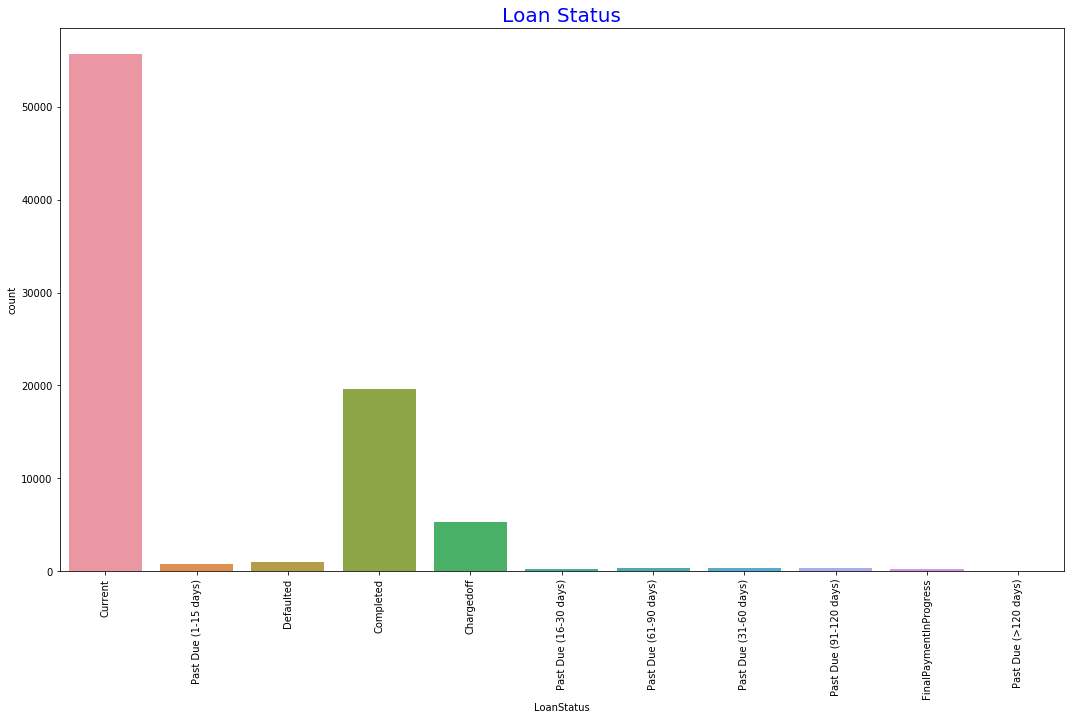

In [20]:
plt.figure(figsize = [18, 10])
plt.title('Loan Status', color='Blue',fontsize=20)
plt.xticks(rotation = 90)
sns.countplot(df_exp["LoanStatus"]);

> Most of the loan in this dataset is still current(on going) as at the data collection date.

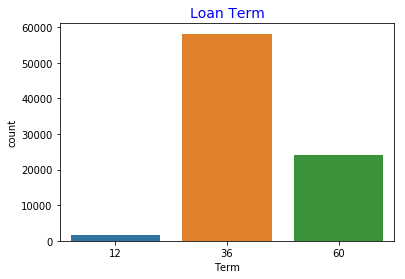

In [21]:
plt.title('Loan Term', fontsize=14, color='blue')
sns.countplot(df_exp["Term"]);

> Most of the loan is for 36 months (3 years). The least loan term is 12 months (1 year).

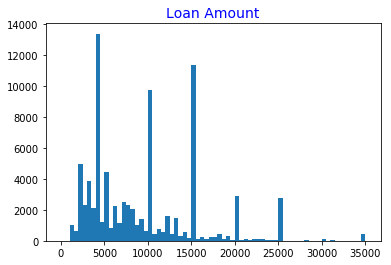

In [22]:
plt.title('Loan Amount', fontsize=14, color='blue')
binsize = 500
bins = np.arange(0, df_exp['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data= df_exp,x='LoanOriginalAmount', bins = bins);

> The largest amount borrowed is of the average of 5,000, 10,000, and 15,000.

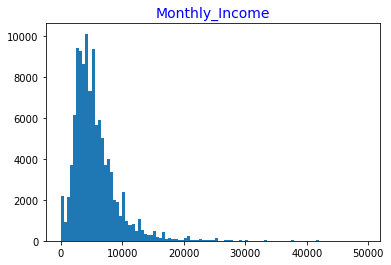

In [23]:
plt.title('Monthly_Income', fontsize=14, color='blue')
bins = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins);

> This is severely right screwed, with stated monthly income less than 30k. and peak around 6K. There are a few outliers that should be removed.

### Financial Condition

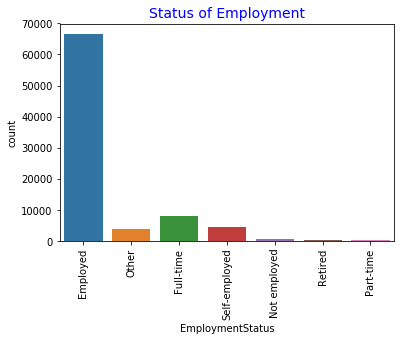

In [24]:
plt.title('Status of Employment', fontsize=14, color='blue')
sns.countplot(df_exp["EmploymentStatus"]);
plt.xticks(rotation = 90);

(-1.1037277509820564,
 1.1016005229313539,
 -1.1026462697186283,
 1.102682004194782)

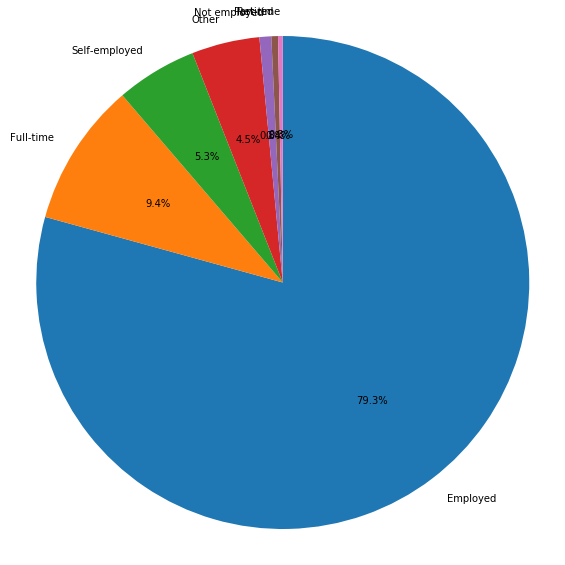

In [25]:
plt.figure(figsize = [18, 10])
e_c = df_exp['EmploymentStatus'].value_counts()
plt.pie(e_c, labels = e_c.index, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.axis('square')

> Most of the borrowers are employed.

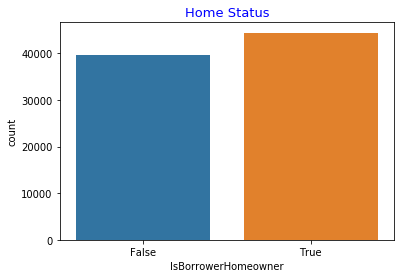

In [26]:
plt.title('Home Status', color='blue',fontsize=13)
sns.countplot(df_exp["IsBorrowerHomeowner"]);

> There really isn't much of a diffrence as regards home ownership of the borrower.

### Why take loan 

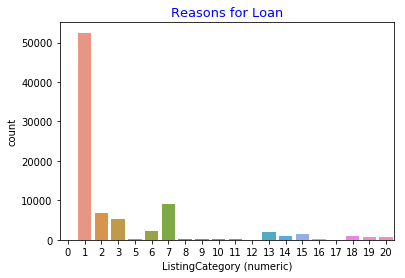

In [27]:
plt.title('Reasons for Loan', color='blue',fontsize=13)
sns.countplot(df_exp["ListingCategory (numeric)"]);

> Most people took a loan for debt consolidation, Home Improvement, Business and Other reasons. 

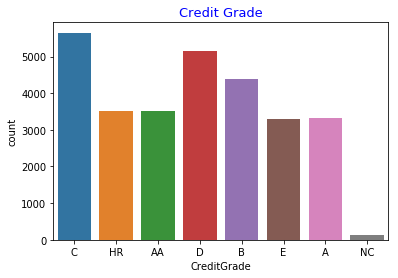

In [28]:
plt.title('Credit Grade', color='blue',fontsize=13)
sns.countplot(df["CreditGrade"]);

> This information are pre 2009 but credit rating is low. Despite the low credit rating there are no issues of default payment-from the loan status visualization-

In [29]:
#plt.title('Prosper Rating', color='blue',fontsize=13)
#sns.countplot(data = df_loan, x = 'ProsperRating (Alpha)');

In [30]:
#bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
#plt.figure(figsize=[8, 5])
#plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
#plt.hist(df_exp[np.isfinite(df['BorrowerAPR'])].values, bins = bins)
#plt.xlabel('Borrower APR')
#plt.ylabel('count')
#plt.title('Borrower APR Distribution');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the borrowers were employed and needed the loan for debt consolidation which amount ranging from 5,000 - 15,000. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The monthly income distribution is highly right screwed. I did not perform any operations to the data.

## Bivariate Exploration

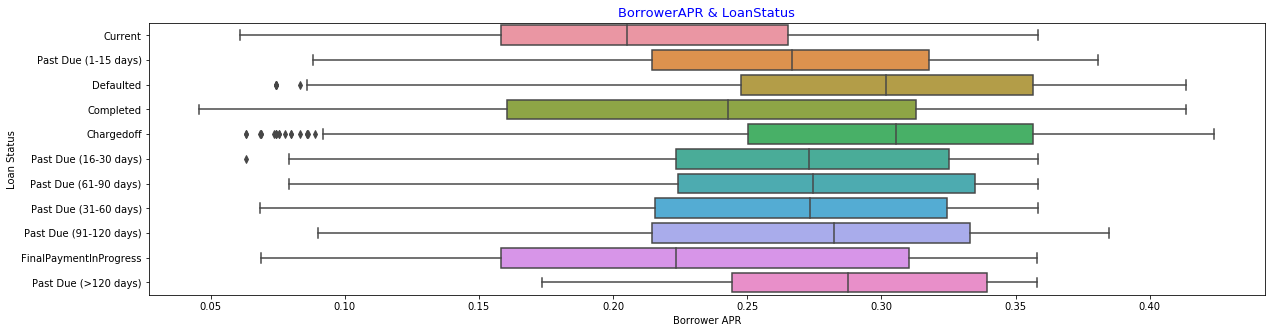

In [31]:
plt.figure(figsize = [20, 5])


sns.boxplot(data=df_exp,x='BorrowerAPR',y='LoanStatus');
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus',color='blue',fontsize=13);

Current and completed loans have lower rate than the past-due loans and chargedoff. Current have BorrowerAPR in range between 0.2 and 0.3.

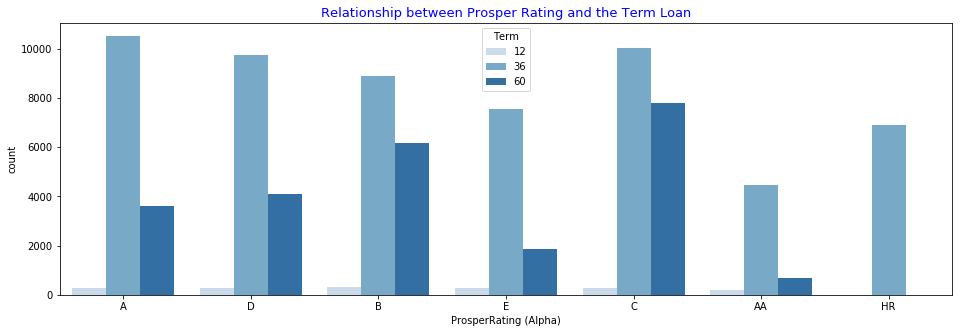

In [32]:
plt.figure(figsize = [16, 5]);
plt.title('Relationship between Prosper Rating and the Term Loan',color='blue',fontsize=13);
sns.countplot(data = df_exp, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

> Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

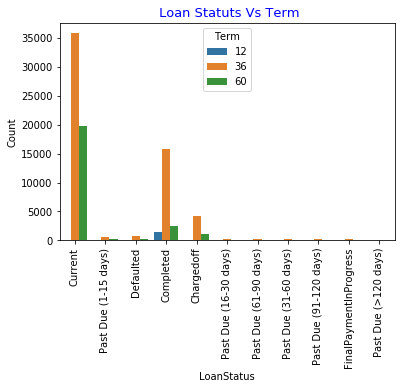

In [33]:
sns.countplot(data = df_exp, x = 'LoanStatus', hue = 'Term')
plt.xticks(rotation = 90)
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.title(' Loan Statuts Vs Term',color='blue',fontsize=13);

A large percentage of borrowers with three year Term are still paying the loan. About 34,000 has completed the loans.

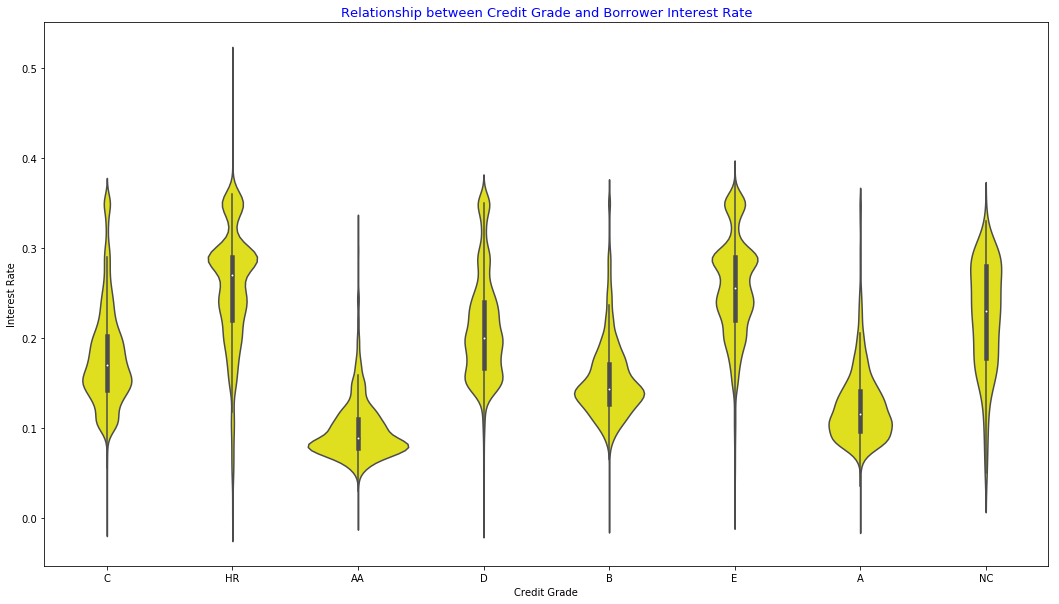

In [34]:
plt.figure(figsize = [18, 10]);

plt.title('Relationship between Credit Grade and Borrower Interest Rate',color='blue',fontsize=13);
sns.violinplot(data=df, x='CreditGrade', y='BorrowerRate', color='yellow');
plt.xlabel('Credit Grade');
plt.ylabel('Interest Rate');

> As expected, the higher the Credit Grade the lower the Borrower interest rate tends to be.

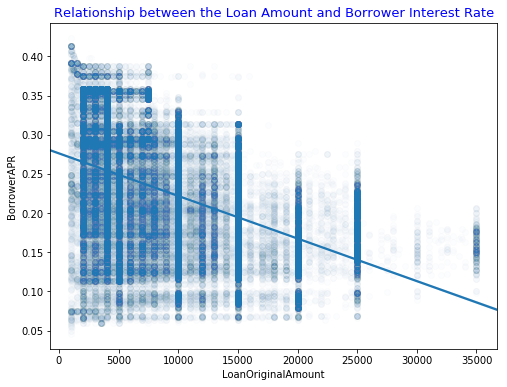

In [35]:
plt.figure(figsize = [8, 6])
plt.title('Relationship between the Loan Amount and Borrower Interest Rate',color='blue',fontsize=13);
sns.regplot(data = df_exp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

> The APR has a large range, but the range decreases with the increase of loan amount. This shows a negative correlation between borrower APR and loan amount.

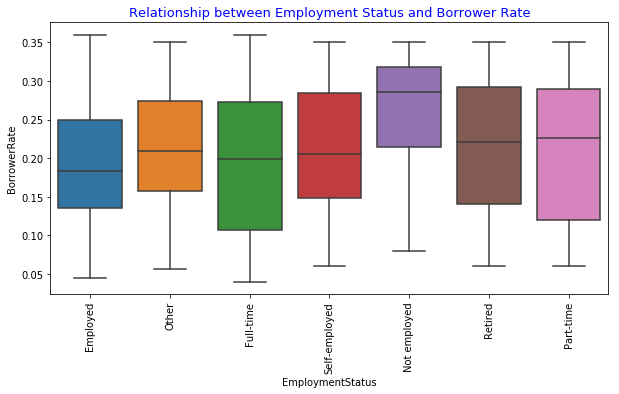

In [36]:
plt.figure(figsize = [10, 5])

plt.title('Relationship between Employment Status and Borrower Rate',color='blue',fontsize=13)
plt.xticks(rotation=90)
sns.boxplot(data=df_exp, x='EmploymentStatus', y='BorrowerRate');

Borrowers employed full-time or part-time can have a lower interest rate than a self-employed, which means that working for a company is more beneficial (when asking for a loan at least) than being an entrepeneur or a freelancer.

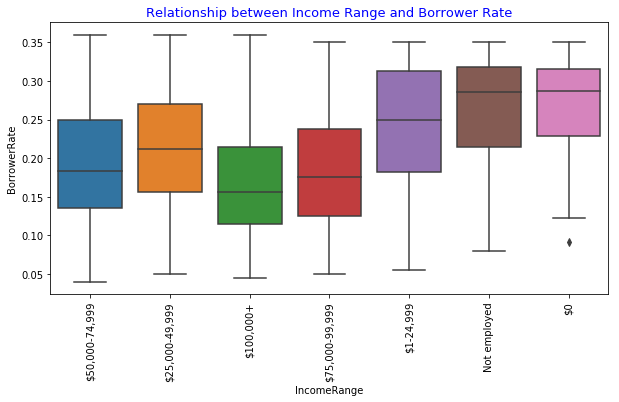

In [37]:
plt.figure(figsize = [10, 5])

plt.title('Relationship between Income Range and Borrower Rate',color='blue',fontsize=13)
plt.xticks(rotation=90)
sns.boxplot(data=df_exp, x='IncomeRange', y='BorrowerRate');

The higher the income the lower the Borrower interest rate tend to be.

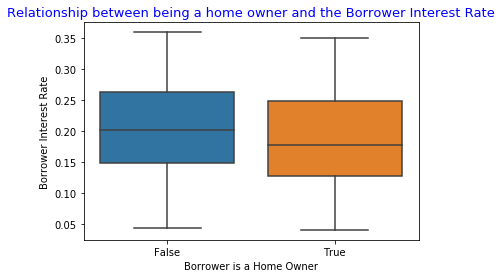

In [38]:
plt.title('Relationship between being a home owner and the Borrower Interest Rate',color='blue',fontsize=13)
sns.boxplot(data=df_exp, x='IsBorrowerHomeowner', y='BorrowerRate');
plt.xlabel('Borrower is a Home Owner');
plt.ylabel('Borrower Interest Rate');

Home owners tend to have a lower Borrower interest rate, also, the maximum interest rate is lower than the maximum of borrowers that do not own a home.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I visualized a few of the variables to understand their patterns and relationship with each other. I was able to know that the borrowers who owned a home tend to have a lower interest rate. A pattern was also seen between the credit grade and interest rate which leads me to believe that the higher the Credit Grade the lower the Borrower interest rate tends to be. There is also a negative correlation between the APR and loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Seeing as the home ownership status of the borrower does not really affect the loan status. I am not so sure about further exploration but I'll keep in mind that it does affect the interest rate.There is also an interaction between prosper rating and term. More 60 month loans are on B and C ratings while there is only 36 months loans for HR rating borrowers.

## Multivariate Exploration

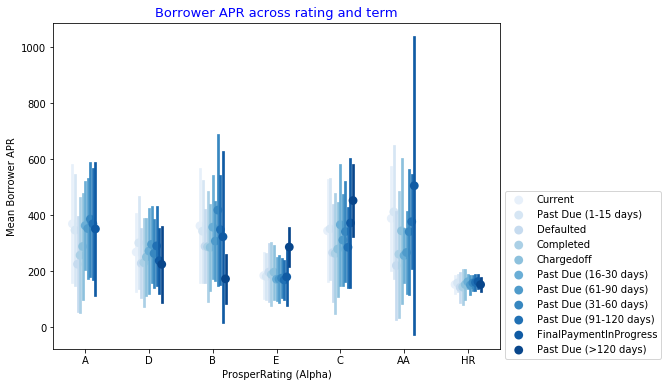

In [39]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_exp, x = 'ProsperRating (Alpha)', y = 'MonthlyLoanPayment', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term',color='blue',fontsize=13)
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True); 
plt.legend(bbox_to_anchor=(1, 0.5))

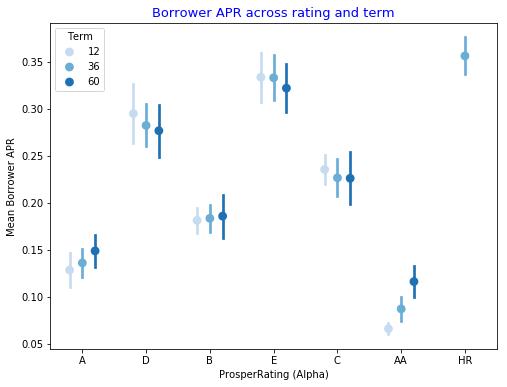

In [40]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_exp, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term',color='blue',fontsize=13)
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

> The borrower APR decreases with the increase of borrow term for people with HR, E, D and C ratings. But for people with B, A and AA ratings, the APR increases with the increase of the borrow term.

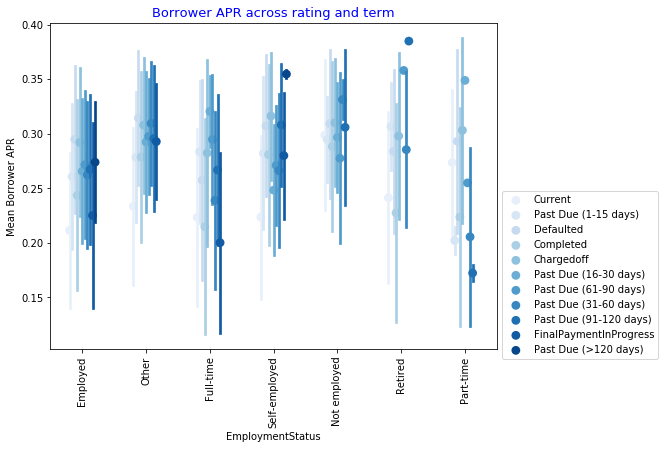

In [41]:
fig = plt.figure(figsize = [8,6])
plt.xticks(rotation=90)
ax = sns.pointplot(data = df_exp, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term',color='blue',fontsize=13)
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.legend(bbox_to_anchor=(1, 0.5))

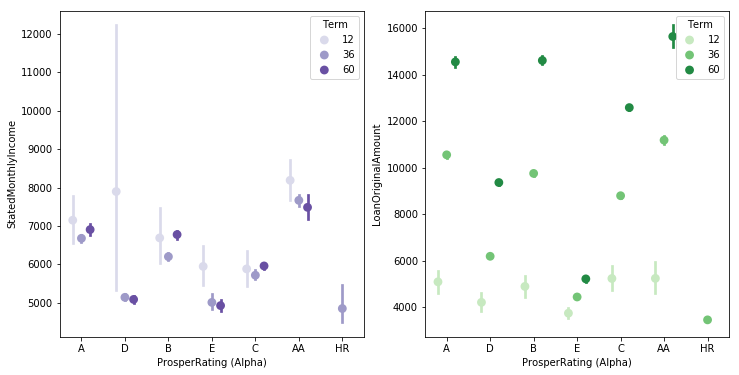

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sns.pointplot(data = df_exp, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sns.pointplot(data = df_exp, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

> There doesn't seem to be an interaction between term and rating, the term pattern is quite similar among different ratings. But for loan amount, there is a interaction between term and rating, with better Prosper rating, the loan amount of all three terms increases.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The rating and term effects on loan amount was explored, it shows that with better Prosper rating, the loan amount of all three terms increases. There also seem to be a correlation between APR and term loan.

### Were there any interesting or surprising interactions between features?

> Borrower APR decreases with the increase of borrow term for people with HR, E, D and C ratings. But for people with B, A and AA ratings, the APR increases with the borrow term.